# Support Vector Machine (SVM)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from utils import make_normal_data
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

## Dados Sintéticos

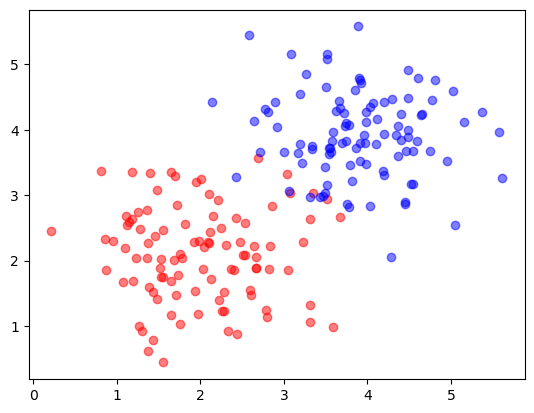

In [45]:
np.random.seed(0)

s1 = 0.7
s2 = 0.7
c1 = np.array([2,2])
c2 = np.array([4,4])
n1 = 100
n2 = 100
x1, y1 = make_normal_data(s = s1, n = n1, c = c1, dim = 2, label = 1)
x2, y2 = make_normal_data(s = s2, n = n2, c = c2, dim = 2, label = -1)
xall = np.vstack((x1, x2))
yall = np.hstack((y1, y2))
plt.plot(x1[:,0], x1[:,1], 'ro', label = 'class 1',  alpha = 0.5)
plt.plot(x2[:,0], x2[:,1], 'bo', label = 'class 2',  alpha = 0.5)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(xall, yall, test_size=0.3)

model = SVC(kernel='rbf', C=10, gamma='scale')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.91      1.00      0.95        31
         1.0       1.00      0.90      0.95        29

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



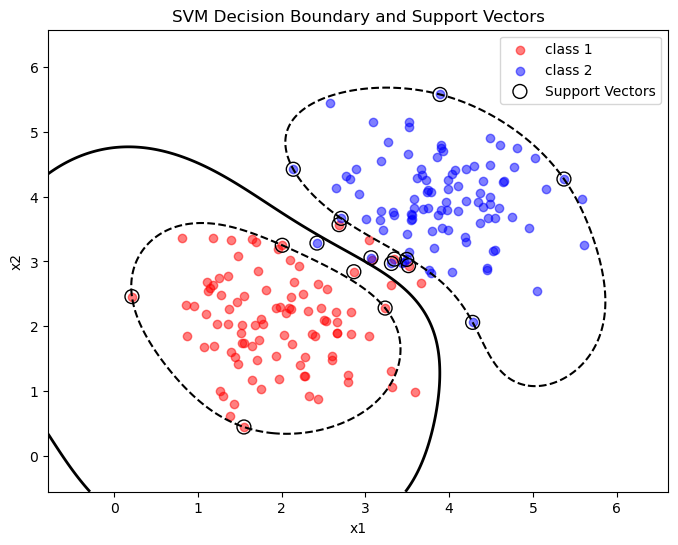

In [47]:
# Plot decision boundary and support vectors
plt.figure(figsize=(8,6))
plt.scatter(x1[:,0], x1[:,1], c='red', label='class 1', alpha=0.5)
plt.scatter(x2[:,0], x2[:,1], c='blue', label='class 2', alpha=0.5)

# Create grid to evaluate model
xx, yy = np.meshgrid(
    np.linspace(xall[:,0].min()-1, xall[:,0].max()+1, 300),
    np.linspace(xall[:,1].min()-1, xall[:,1].max()+1, 300)
)
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')
plt.contour(xx, yy, Z, levels=[-1, 1], linestyles=['--', '--'], colors='k')

# Plot support vectors
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], 
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.legend()
plt.title('SVM Decision Boundary and Support Vectors')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()